# Installing python libraries

In [ ]:
!pip install pandas statsmodels
!pip install pandas openpyxl
!pip install pandas xlrd
!pip install matplotlib
!pip install plotly

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns

# Load the excel file

In [ ]:
# Load the Excel file
file_path = 'AirQualityUCI.xlsx'
df = pd.read_excel(file_path)  # Reads the first sheet by default


# Date and Time Handling:

    Here we combine Date and Time columns into a single DateTime column.
    Reorder the columns to place DateTime first and drop the original Date and Time columns

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  # Use the correct name if it's different

df['DateTime'] = df['Date'] + pd.to_timedelta(df['Time'], unit='D')

cols = ['DateTime'] + [col for col in df.columns if col != 'DateTime']
df = df[cols]
to_drop=['Date','Time']
df.drop(to_drop, inplace=True, axis=1)
df.head()

output_file = 'updated_data.xlsx'  # Specify your desired output file name

df.to_excel(output_file, index=False)  # Save to Excel without the index column

print(f"The updated data with DateTime column has been saved to {output_file}.")


df = pd.read_excel('updated_data.xlsx', parse_dates=['DateTime'])
cols = ['DateTime'] + [col for col in df.columns if col != 'DateTime']
df = df[cols]
print(df.columns)

The updated data with DateTime column has been saved to updated_data.xlsx.
Index(['DateTime', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


#Handling Null Values

In [ ]:
df.isnull().sum()


# We need to visualise the columns once to make sure that there are no NULL values

In [ ]:
import matplotlib.pyplot as plt

def visualize_all_columns(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(10, 5))
        plt.plot(df.index, df[column], label=column)
        plt.title(f'Visualization of {column}')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function to plot
visualize_all_columns(df)


#Handling Null Values
From the visualizations, it is evident that all columns contain a significant number of data points with the value -200. These values consistently appear as anomalies or gaps in the trends of the data. Based on this pattern and the nature of the dataset, it is reasonable to assume that -200 represents missing or null values

In [ ]:
df = df.replace(-200, np.nan)
df.isnull().sum()



,0
DateTime,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642
PT08.S4(NO2),366


In [ ]:
df.columns

Index(['DateTime', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

# Find the missing percentage

In [ ]:
missing_percentage = df.isnull().mean() * 100

print("Missing percentage for each column:")
print(missing_percentage)

Missing percentage for each column:
DateTime          0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64


# Drop Columns with more than 50% data missing

In [ ]:
columns_to_remove = missing_percentage[missing_percentage > 50].index.tolist()

df.drop(columns=columns_to_remove, inplace=True)

df.columns


Index(['DateTime', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

# Visualise the missing values

<ipython-input-9-83952cf7173d>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


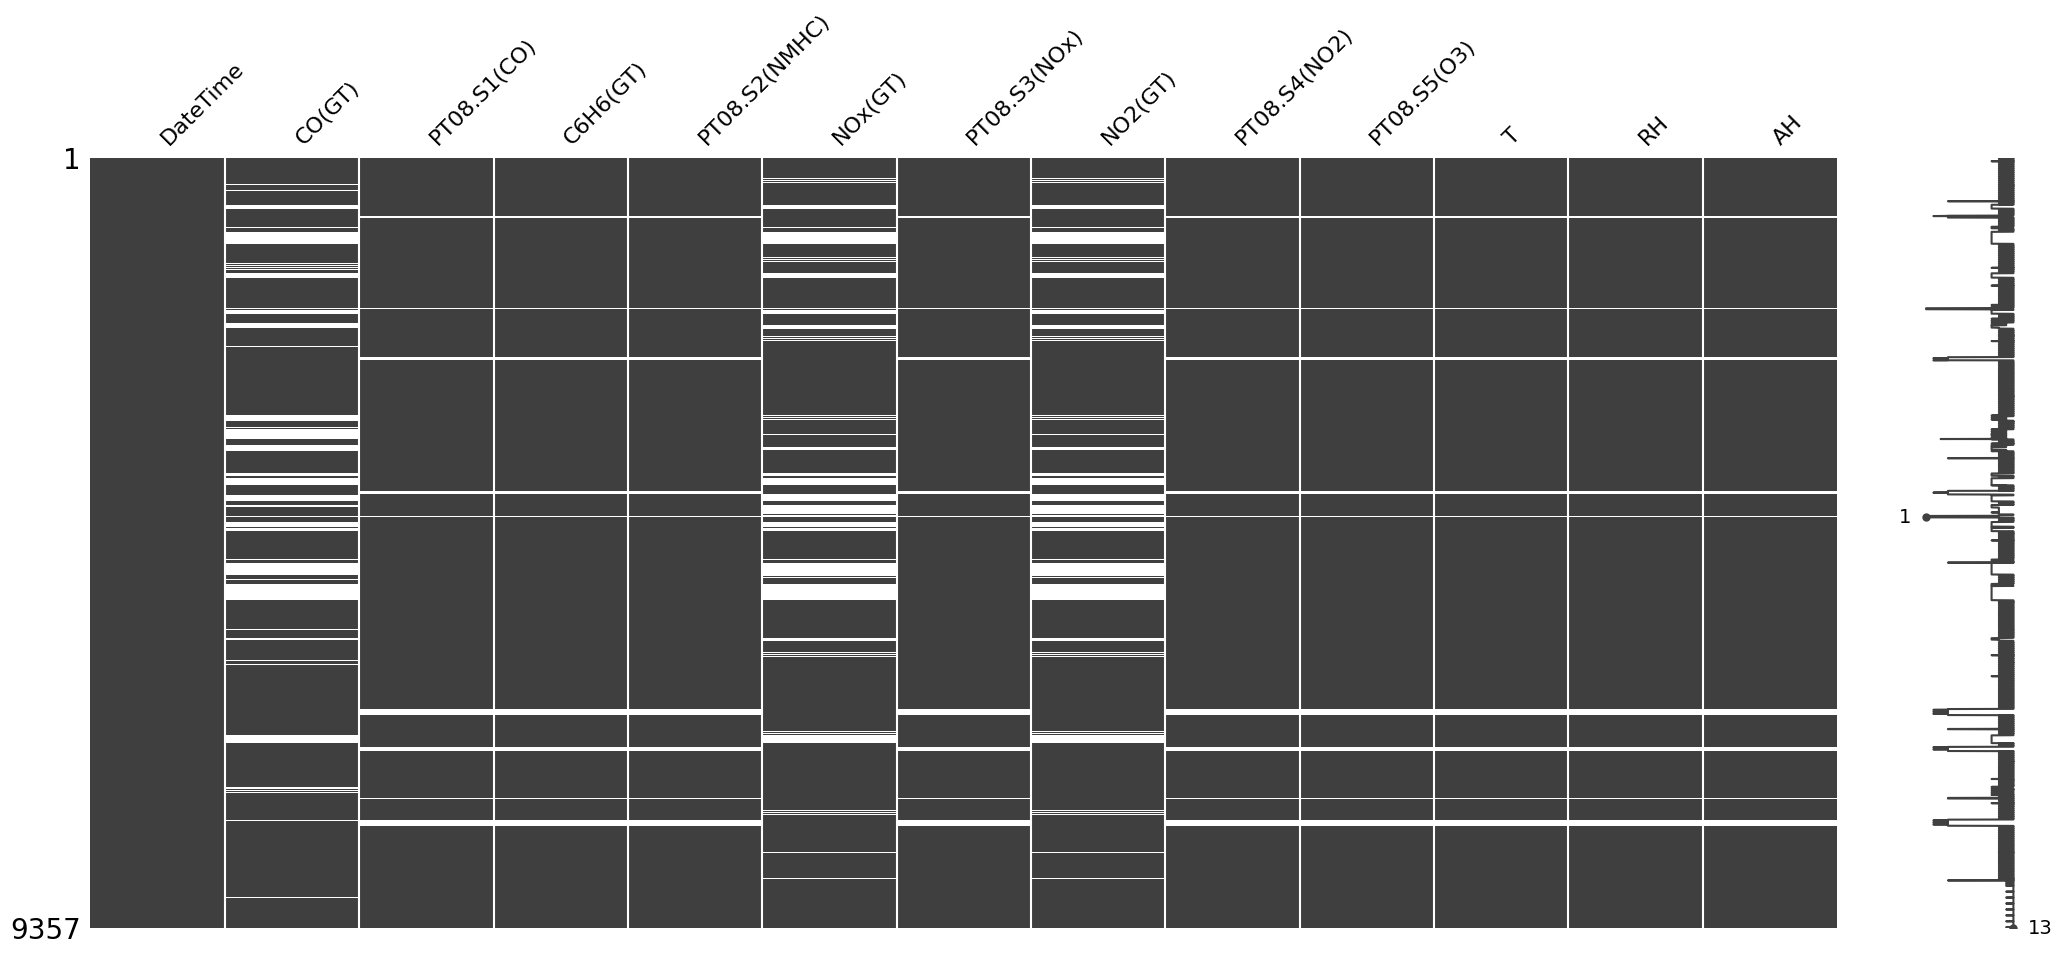

In [ ]:
import missingno as msno
msno.matrix(df)




df.fillna(method='ffill', inplace=True)


# Date as Index

In [ ]:
df.set_index('DateTime', inplace=True)



print(df.index)




DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=9357, freq=None)


In [ ]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


# Granger Matrix
Here we analyze causal relationships between air pollutants and weather variables using Granger causality tests.

1. **Data Setup**:  
   - We define pollutant and weather variables and initialize a results matrix to store p-values for the Granger causality tests.

2. **Granger Causality Test**:  
   - We perform Granger causality tests for each pair of variables and store the p-values in the matrix.

3. **Visualization**:  
   - We generate a heatmap to display p-values, highlighting significant relationships (p < 0.05) in **red** and non-significant ones in **green**.

4. **Causal Relationships**:  
   - We identify variables with p < 0.05 for each weather variable and print the results.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

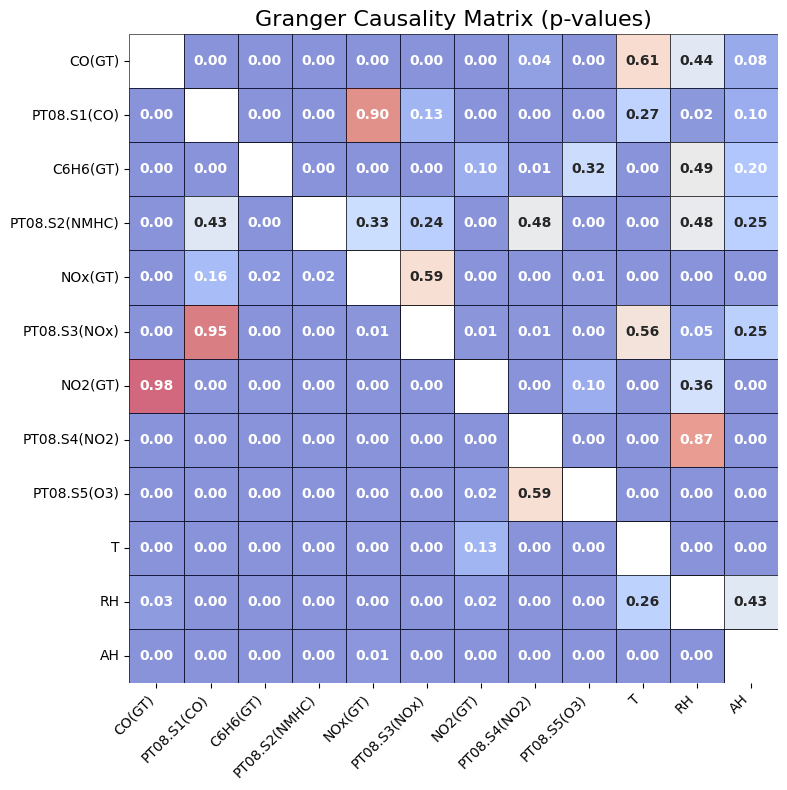

Causal Relationships with p < 0.05:
T: ['C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'AH']
RH: ['PT08.S1(CO)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S5(O3)', 'T', 'AH']
AH: ['NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T']


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming df is your DataFrame with the air pollutants and weather variables

pollutant_columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)']
weather_columns = ['T', 'RH', 'AH']

# Initialize a matrix to store Granger causality results
results_matrix = pd.DataFrame(index=pollutant_columns + weather_columns,
                               columns=pollutant_columns + weather_columns)

# Perform Granger causality tests
for col1 in pollutant_columns + weather_columns:
    for col2 in pollutant_columns + weather_columns:
        if col1 != col2:
            # Test if col1 Granger-causes col2 (check lag order, here using 1 lag)
            test_result = grangercausalitytests(df[[col1, col2]], maxlag=1, verbose=False)
            results_matrix.loc[col1, col2] = test_result[1][0]['ssr_chi2test'][1]  # p-value for the test

# Convert p-values to numeric (optional, if they are not already)
results_matrix = results_matrix.astype(float)

# Create a color map based on the conditions
colors = np.where(results_matrix < 0.05, 'red', 'green')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(results_matrix.astype(float), annot=True, fmt=".2f", cmap='coolwarm',
            cbar=False, square=True, linewidths=.5, linecolor='black',
            mask=results_matrix.isna(),
            annot_kws={"size": 10, "weight": "bold"},
            alpha=0.6,
            cbar_kws={"shrink": .8},
            xticklabels=results_matrix.columns,
            yticklabels=results_matrix.index)

# Customize the heatmap aesthetics
plt.title('Granger Causality Matrix (p-values)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


causal_relationships = {'T': [], 'RH': [], 'AH': []}

# Iterate over each weather variable and find causative columns with p < 0.05
for target in causal_relationships.keys():
    # Filter columns that Granger-cause the target with p < 0.05
    causal_columns = results_matrix.loc[:, target][results_matrix.loc[:, target] <=0.05].index.tolist()
    causal_relationships[target] = causal_columns

# Print the causal relationships dictionary
print("Causal Relationships with p < 0.05:")
for target, causes in causal_relationships.items():
    print(f"{target}: {causes}")


In [ ]:
null_counts = df.isnull().sum()
print(null_counts)


CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
df.fillna(method='ffill', inplace=True)  # Forward fill NaN values

<ipython-input-14-ee4f85c03f84>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill NaN values


## Here we are training SARIMAX models to forecast weather variables (T, AH, RH) using air pollutants as exogenous variables

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
import numpy as np
from sklearn.metrics import mean_squared_error

# we take exactly 1 year for training

train_end_date = '2005-03-10'  # Adjust based on your exact date format
train_data = df.loc[:train_end_date]
test_data = df.loc[train_end_date:]

target_vars = ['T', 'AH', 'RH']
causal_columns = {
    'T': ["CO(GT)", "PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)"],
    'RH': ["CO(GT)", "PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)"],
    'AH': ["CO(GT)", "PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)"]
}

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(method='ffill', inplace=True)

models = {}
forecasts = {}
mse_scores = {}

for target in target_vars:
    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 12)

    exog_columns = causal_columns[target]
    exog_train = train_data[exog_columns]
    exog_test = test_data[exog_columns]

    model = SARIMAX(
        train_data[target],
        exog=exog_train,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=True
    )

    # Fit the model
    results = model.fit(disp=False)
    models[target] = results

    forecast = results.get_forecast(steps=len(test_data), exog=exog_test)
    forecasts[target] = forecast.predicted_mean

    mse = mean_squared_error(test_data[target], forecast.predicted_mean)
    mse_scores[target] = mse

forecast_df = pd.DataFrame(forecasts, index=test_data.index)

print("\nMSE Scores:\n", mse_scores)


<ipython-input-15-8738ea3a4c5c>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill NaN values
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, s


MSE Scores:
 {'T': 630.0622126585628, 'AH': 1.846031802937427, 'RH': 955.9220017293496}


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
import numpy as np
from sklearn.metrics import mean_squared_error

causal_columns2 = {
    'T': ['CO(GT)', 'PT08.S1(CO)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)'],

    'RH': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S5(O3)'],

    'AH': ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
}

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(method='ffill', inplace=True)

models = {}
forecasts = {}
mse_scores = {}

for target in target_vars:
    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 12)

    exog_columns = causal_columns2[target]
    exog_train = train_data[exog_columns]
    exog_test = test_data[exog_columns]

    model = SARIMAX(
        train_data[target],
        exog=exog_train,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=True
    )

    results = model.fit(disp=False)
    models[target] = results

    forecast = results.get_forecast(steps=len(test_data), exog=exog_test)
    forecasts[target] = forecast.predicted_mean

    mse = mean_squared_error(test_data[target], forecast.predicted_mean)
    mse_scores[target] = mse

forecast_df = pd.DataFrame(forecasts, index=test_data.index)

print("\nMSE Scores:\n", mse_scores)


<ipython-input-16-5c3829cd9ce3>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill NaN values
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, s


MSE Scores:
 {'T': 108.10574044491175, 'AH': 1.816913397605145, 'RH': 687.0480560485555}


- T (Temperature): Decreased by 521.96 (82.84%)
- AH (Absolute Humidity): Decreased by 0.03 (1.58%)
- RH (Relative Humidity): Decreased by 268.87 (28.13%)

The *improvements* are most significant for **T** and **RH**, with minor improvement for **AH**.

## As we can see the MSE from using only the Granger columns is lesser than using all the other air pollutant columns as exogeneous

# NOW USING LSTM

In [ ]:
file_path = 'AirQualityUCI.xlsx'
df = pd.read_excel(file_path)  # Reads the first sheet by default



In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  # Use the correct name if it's different

df['DateTime'] = df['Date'] + pd.to_timedelta(df['Time'], unit='D')

cols = ['DateTime'] + [col for col in df.columns if col != 'DateTime']
df = df[cols]
to_drop=['Date','Time']
df.drop(to_drop, inplace=True, axis=1)
df.head()

output_file = 'updated_data.xlsx'  # Specify your desired output file name

df.to_excel(output_file, index=False)  # Save to Excel without the index column

print(f"The updated data with DateTime column has been saved to {output_file}.")


df = pd.read_excel('updated_data.xlsx', parse_dates=['DateTime'])
cols = ['DateTime'] + [col for col in df.columns if col != 'DateTime']
df = df[cols]
print(df.columns)

<ipython-input-6-91cbea1e425f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(to_drop, inplace=True, axis=1)


The updated data with DateTime column has been saved to updated_data.xlsx.
Index(['DateTime', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [ ]:
df = df.replace(-200, np.nan)
df.isnull().sum()



,0
DateTime,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642
PT08.S4(NO2),366


In [ ]:
df.columns

Index(['DateTime', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
missing_percentage = df.isnull().mean() * 100

# Print the missing percentage for each column
print("Missing percentage for each column:")
print(missing_percentage)

Missing percentage for each column:
DateTime          0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64


# Drop columns with more than 50 % data missing


In [ ]:
columns_to_remove = missing_percentage[missing_percentage > 50].index.tolist()

df.drop(columns=columns_to_remove, inplace=True)

df.columns


Index(['DateTime', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

<ipython-input-11-83952cf7173d>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


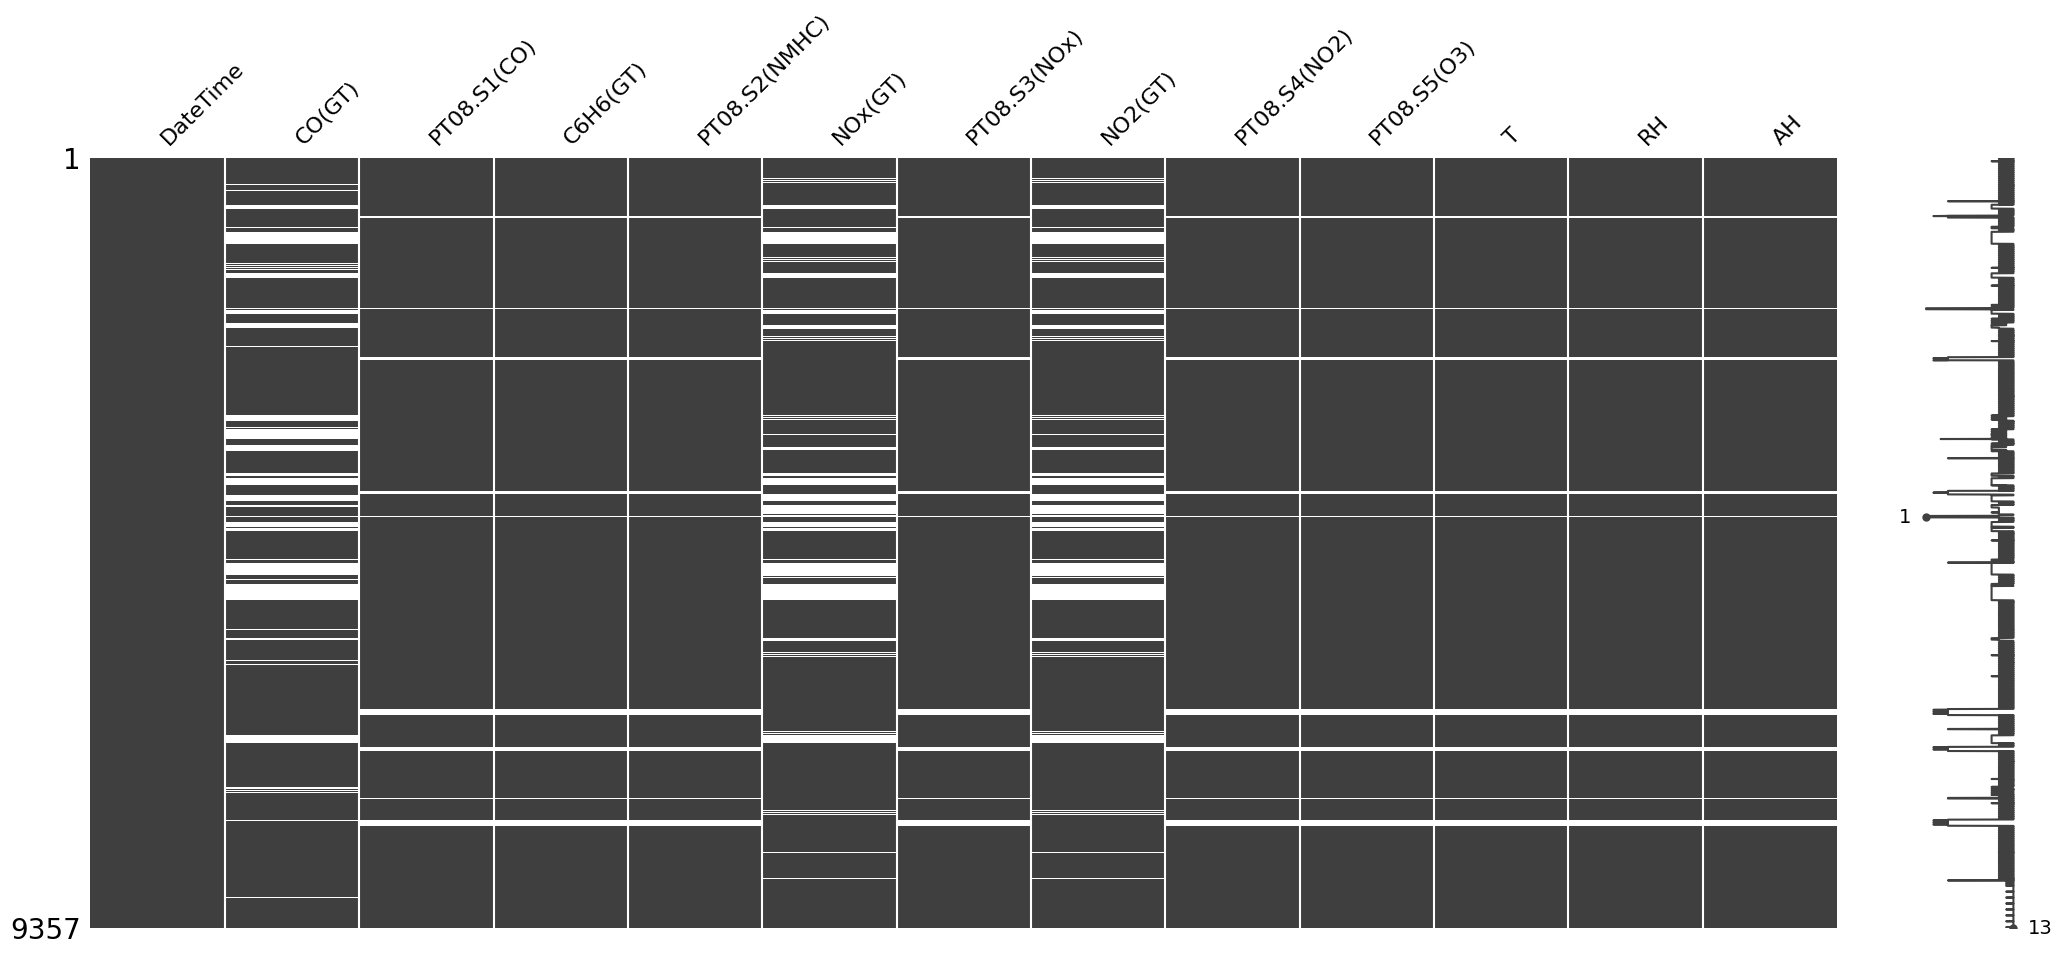

In [ ]:
import missingno as msno
msno.matrix(df)




df.fillna(method='ffill', inplace=True)


# VIF Should be less

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
        'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH','AH']]

X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


         Variable         VIF
0           const  661.364234
1          CO(GT)    5.121949
2     PT08.S1(CO)    8.790314
3        C6H6(GT)   43.492017
4   PT08.S2(NMHC)   67.783749
5         NOx(GT)    6.354058
6    PT08.S3(NOx)    5.604041
7         NO2(GT)    4.398583
8    PT08.S4(NO2)   14.663263
9     PT08.S5(O3)    8.415414
10              T   14.773409
11             RH    8.473898
12             AH   10.763988


In [ ]:
df.set_index('DateTime', inplace=True)

print(df.index)



DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=9357, freq=None)


In [ ]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


# ADF AND KPSS
### Now we perform two stationarity tests (ADF and KPSS) on each time series column in a DataFrame. It checks whether the series is stationary based on the p-values and stores the results. The results are then visualized in a heatmap, where green indicates stationary series and red indicates non-stationary ones, making it easy to compare the stationarity of each series visually.

ADF Statistic for PT08.S1(CO): -9.876159181287553
p-value for PT08.S1(CO): 3.8775638119893144e-17
Critical Values:
   1%: -3.431051910310215
   5%: -2.8618502001074853
   10%: -2.566935114435797
The series PT08.S1(CO) is stationary (p-value < 0.05).

KPSS Statistic for PT08.S1(CO): 0.5079784260818806
p-value for PT08.S1(CO): 0.0398697238554323
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series PT08.S1(CO) is not stationary (p-value <= 0.05).

ADF Statistic for C6H6(GT): -10.025907033298015
p-value for C6H6(GT): 1.6323544393540554e-17
Critical Values:
   1%: -3.431051910310215
   5%: -2.8618502001074853
   10%: -2.566935114435797
The series C6H6(GT) is stationary (p-value < 0.05).

KPSS Statistic for C6H6(GT): 0.6547949995110708
p-value for C6H6(GT): 0.01765500004444811
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series C6H6(GT) is not stationary (p-value <= 0.05).

ADF Statistic for PT08.S2(NMHC): -10.173096422116464
p-val

<ipython-input-15-26012af64a8a>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for NOx(GT): -7.2317420825735255
p-value for NOx(GT): 1.986421616725097e-10
Critical Values:
   1%: -3.431051082535376
   5%: -2.8618498343263563
   10%: -2.5669349197290257
The series NOx(GT) is stationary (p-value < 0.05).

KPSS Statistic for NOx(GT): 8.212226056988577
p-value for NOx(GT): 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series NOx(GT) is not stationary (p-value <= 0.05).



<ipython-input-15-26012af64a8a>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for PT08.S3(NOx): -10.60324777593878
p-value for PT08.S3(NOx): 6.09417406704062e-19
Critical Values:
   1%: -3.431051834977192
   5%: -2.8618501668189706
   10%: -2.5669350967161857
The series PT08.S3(NOx) is stationary (p-value < 0.05).

KPSS Statistic for PT08.S3(NOx): 3.562148354708599
p-value for PT08.S3(NOx): 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series PT08.S3(NOx) is not stationary (p-value <= 0.05).



<ipython-input-15-26012af64a8a>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for NO2(GT): -8.112565165430665
p-value for NO2(GT): 1.2147708095174233e-12
Critical Values:
   1%: -3.4310515338067336
   5%: -2.8618500337363275
   10%: -2.566935025875756
The series NO2(GT) is stationary (p-value < 0.05).

KPSS Statistic for NO2(GT): 7.143054266759467
p-value for NO2(GT): 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series NO2(GT) is not stationary (p-value <= 0.05).



<ipython-input-15-26012af64a8a>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for PT08.S4(NO2): -6.230709761992313
p-value for PT08.S4(NO2): 4.961466062845954e-08
Critical Values:
   1%: -3.431051910310215
   5%: -2.8618502001074853
   10%: -2.566935114435797
The series PT08.S4(NO2) is stationary (p-value < 0.05).

KPSS Statistic for PT08.S4(NO2): 9.203126283744997
p-value for PT08.S4(NO2): 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series PT08.S4(NO2) is not stationary (p-value <= 0.05).



<ipython-input-15-26012af64a8a>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for PT08.S5(O3): -10.781274426372532
p-value for PT08.S5(O3): 2.2519335559747865e-19
Critical Values:
   1%: -3.431051834977192
   5%: -2.8618501668189706
   10%: -2.5669350967161857
The series PT08.S5(O3) is stationary (p-value < 0.05).

KPSS Statistic for PT08.S5(O3): 1.1421876132654747
p-value for PT08.S5(O3): 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series PT08.S5(O3) is not stationary (p-value <= 0.05).



<ipython-input-15-26012af64a8a>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for T: -3.2034264132448094
p-value for T: 0.019787199675308245
Critical Values:
   1%: -3.4310513080984597
   5%: -2.861849933999267
   10%: -2.566934972785317
The series T is stationary (p-value < 0.05).

KPSS Statistic for T: 7.458158265259786
p-value for T: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series T is not stationary (p-value <= 0.05).



<ipython-input-15-26012af64a8a>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for RH: -7.317408747917466
p-value for RH: 1.2190229463372833e-10
Critical Values:
   1%: -3.431051985659412
   5%: -2.8618502334031457
   10%: -2.5669351321592124
The series RH is stationary (p-value < 0.05).

KPSS Statistic for RH: 2.720203718453618
p-value for RH: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series RH is not stationary (p-value <= 0.05).



<ipython-input-15-26012af64a8a>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for AH: -5.094233955061311
p-value for AH: 1.4398126749774894e-05
Critical Values:
   1%: -3.4310510073799216
   5%: -2.861849801116297
   10%: -2.5669349020511785
The series AH is stationary (p-value < 0.05).

KPSS Statistic for AH: 4.274057491578102
p-value for AH: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series AH is not stationary (p-value <= 0.05).



<ipython-input-15-26012af64a8a>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')
<ipython-input-15-26012af64a8a>:66: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df = results_df.applymap(lambda x: 'Stationary' if x else 'Non-Stationary')


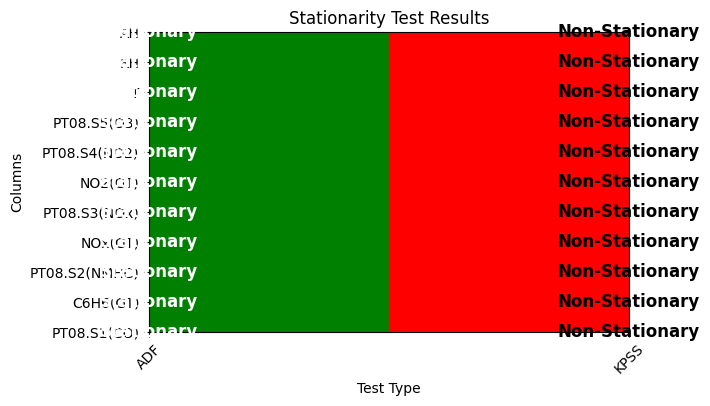

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

results_adf = {}
results_kpss = {}

def adf_test(series, name=''):
    """Perform ADF test and return the results."""
    result = adfuller(series)
    adf_stat = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Determine if the series is stationary
    is_stationary = p_value < 0.05
    results_adf[name] = is_stationary

    print(f'ADF Statistic for {name}: {adf_stat}')
    print(f'p-value for {name}: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')

    if is_stationary:
        print(f'The series {name} is stationary (p-value < 0.05).\n')
    else:
        print(f'The series {name} is not stationary (p-value >= 0.05).\n')

def kpss_test(series, name=''):
    """Perform KPSS test and return the results."""
    statistic, p_value, lags, critical_values = kpss(series, regression='c')

    # Determine if the series is stationary
    is_stationary = p_value > 0.05
    results_kpss[name] = is_stationary

    print(f'KPSS Statistic for {name}: {statistic}')
    print(f'p-value for {name}: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')

    if is_stationary:
        print(f'The series {name} is stationary (p-value > 0.05).\n')
    else:
        print(f'The series {name} is not stationary (p-value <= 0.05).\n')

# Loop through each column except the first one
for column in df.columns[1:]:
    adf_test(df[column], name=column)
    kpss_test(df[column], name=column)

# Prepare results for visualization
labels = list(results_adf.keys())
adf_stationary = list(results_adf.values())
kpss_stationary = list(results_kpss.values())

# Create a DataFrame for results
results_df = pd.DataFrame({
    'ADF': adf_stationary,
    'KPSS': kpss_stationary
}, index=labels)

# Convert boolean values to human-readable strings
results_df = results_df.applymap(lambda x: 'Stationary' if x else 'Non-Stationary')

# Plotting with matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

# Create a heatmap-like structure with color map and annotations
cmap = {'Stationary': 'green', 'Non-Stationary': 'red'}

# Plot matrix of stationarity results
for i, row in enumerate(results_df.index):
    for j, col in enumerate(results_df.columns):
        value = results_df.at[row, col]
        ax.text(j, i, value, ha='center', va='center',
                color='white' if value == 'Stationary' else 'black',
                fontsize=12, fontweight='bold')

        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color=cmap[value]))

# Set plot details
ax.set_xticks(range(len(results_df.columns)))
ax.set_yticks(range(len(results_df.index)))
ax.set_xticklabels(results_df.columns)
ax.set_yticklabels(results_df.index)

ax.set_title('Stationarity Test Results')
ax.set_xlabel('Test Type')
ax.set_ylabel('Columns')

# Adjust the layout and show the plot
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.show()


# Differencing

In [ ]:

# Display original DataFrame
print("Original DataFrame:")
print(df.columns)

df.iloc[:, :] = df.diff()  # Apply differencing to all columns

# Display differenced DataFrame
print("\nDifferenced DataFrame:")
print(df.columns)

Original DataFrame:
Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

Differenced DataFrame:
Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')


In [ ]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,
2004-03-10 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-10 19:00:00,-0.6,-67.75,-2.484559,-90.75,-63.0,117.50,-21.0,-133.25,-295.25,-0.30,-1.175001,-0.032266
2004-03-10 20:00:00,0.2,109.75,-0.399348,-15.50,28.0,-33.75,22.0,-4.25,101.75,-1.40,6.275001,0.024752
2004-03-10 21:00:00,0.0,-26.50,0.230980,9.00,41.0,-48.00,8.0,29.25,129.25,-0.90,6.025000,0.036473
2004-03-10 22:00:00,-0.6,-103.25,-2.710573,-112.75,-41.0,113.00,-6.0,-93.75,-93.25,0.15,-0.424999,0.002082


In [ ]:
df.isna().sum()

,0
CO(GT),1
PT08.S1(CO),1
C6H6(GT),1
PT08.S2(NMHC),1
NOx(GT),1
PT08.S3(NOx),1
NO2(GT),1
PT08.S4(NO2),1
PT08.S5(O3),1
T,1


In [ ]:
df.drop(df.index[0], inplace=True)

# ADF AND KPSS

<ipython-input-20-32ee4c47a8d2>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


ADF Statistic for PT08.S1(CO): -18.505430937661636
p-value for PT08.S1(CO): 2.1178882434233503e-30
Critical Values:
   1%: -3.431051985659412
   5%: -2.8618502334031457
   10%: -2.5669351321592124
The series PT08.S1(CO) is stationary (p-value < 0.05).

KPSS Statistic for PT08.S1(CO): 0.02603385053953997
p-value for PT08.S1(CO): 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series PT08.S1(CO) is stationary (p-value > 0.05).



<ipython-input-20-32ee4c47a8d2>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for C6H6(GT): -20.275662066709682
p-value for C6H6(GT): 0.0
Critical Values:
   1%: -3.431051910310215
   5%: -2.8618502001074853
   10%: -2.566935114435797
The series C6H6(GT) is stationary (p-value < 0.05).

KPSS Statistic for C6H6(GT): 0.01711996766862632
p-value for C6H6(GT): 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series C6H6(GT) is stationary (p-value > 0.05).



<ipython-input-20-32ee4c47a8d2>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for PT08.S2(NMHC): -19.92755328788859
p-value for PT08.S2(NMHC): 0.0
Critical Values:
   1%: -3.431051910310215
   5%: -2.8618502001074853
   10%: -2.566935114435797
The series PT08.S2(NMHC) is stationary (p-value < 0.05).

KPSS Statistic for PT08.S2(NMHC): 0.011955900835067096
p-value for PT08.S2(NMHC): 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series PT08.S2(NMHC) is stationary (p-value > 0.05).



<ipython-input-20-32ee4c47a8d2>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for NOx(GT): -24.793706711496664
p-value for NOx(GT): 0.0
Critical Values:
   1%: -3.43105123289464
   5%: -2.861849900767839
   10%: -2.566934955096094
The series NOx(GT) is stationary (p-value < 0.05).

KPSS Statistic for NOx(GT): 0.016025501300394988
p-value for NOx(GT): 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series NOx(GT) is stationary (p-value > 0.05).



<ipython-input-20-32ee4c47a8d2>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for PT08.S3(NOx): -18.944941543306854
p-value for PT08.S3(NOx): 0.0
Critical Values:
   1%: -3.431051910310215
   5%: -2.8618502001074853
   10%: -2.566935114435797
The series PT08.S3(NOx) is stationary (p-value < 0.05).

KPSS Statistic for PT08.S3(NOx): 0.011035936154038745
p-value for PT08.S3(NOx): 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series PT08.S3(NOx) is stationary (p-value > 0.05).



<ipython-input-20-32ee4c47a8d2>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for NO2(GT): -24.007534639160152
p-value for NO2(GT): 0.0
Critical Values:
   1%: -3.43105123289464
   5%: -2.861849900767839
   10%: -2.566934955096094
The series NO2(GT) is stationary (p-value < 0.05).

KPSS Statistic for NO2(GT): 0.02422847967662421
p-value for NO2(GT): 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series NO2(GT) is stationary (p-value > 0.05).



<ipython-input-20-32ee4c47a8d2>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for PT08.S4(NO2): -18.763746706662065
p-value for PT08.S4(NO2): 2.026013891042819e-30
Critical Values:
   1%: -3.431051910310215
   5%: -2.8618502001074853
   10%: -2.566935114435797
The series PT08.S4(NO2) is stationary (p-value < 0.05).

KPSS Statistic for PT08.S4(NO2): 0.0394529550959341
p-value for PT08.S4(NO2): 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series PT08.S4(NO2) is stationary (p-value > 0.05).



<ipython-input-20-32ee4c47a8d2>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for PT08.S5(O3): -18.186673281366758
p-value for PT08.S5(O3): 2.4252088525633313e-30
Critical Values:
   1%: -3.431051834977192
   5%: -2.8618501668189706
   10%: -2.5669350967161857
The series PT08.S5(O3) is stationary (p-value < 0.05).

KPSS Statistic for PT08.S5(O3): 0.028156034582581247
p-value for PT08.S5(O3): 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series PT08.S5(O3) is stationary (p-value > 0.05).



<ipython-input-20-32ee4c47a8d2>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for T: -21.74104454326042
p-value for T: 0.0
Critical Values:
   1%: -3.4310513080984597
   5%: -2.861849933999267
   10%: -2.566934972785317
The series T is stationary (p-value < 0.05).

KPSS Statistic for T: 0.0030827263849309942
p-value for T: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series T is stationary (p-value > 0.05).



<ipython-input-20-32ee4c47a8d2>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for RH: -20.238518607695035
p-value for RH: 0.0
Critical Values:
   1%: -3.431052061024788
   5%: -2.8618502667059547
   10%: -2.566935149886433
The series RH is stationary (p-value < 0.05).

KPSS Statistic for RH: 0.0029090682990567445
p-value for RH: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series RH is stationary (p-value > 0.05).



<ipython-input-20-32ee4c47a8d2>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


ADF Statistic for AH: -19.963295934366176
p-value for AH: 0.0
Critical Values:
   1%: -3.4310510073799216
   5%: -2.861849801116297
   10%: -2.5669349020511785
The series AH is stationary (p-value < 0.05).

KPSS Statistic for AH: 0.017148037045652653
p-value for AH: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series AH is stationary (p-value > 0.05).



<ipython-input-20-32ee4c47a8d2>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')
<ipython-input-20-32ee4c47a8d2>:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df = results_df.applymap(lambda x: 'Stationary' if x else 'Non-Stationary')


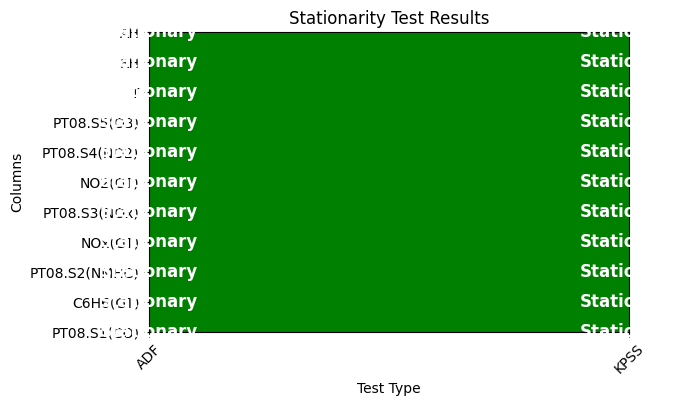

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Assuming df is your DataFrame
# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Store results for visualization
results_adf = {}
results_kpss = {}

def adf_test(series, name=''):
    """Perform ADF test and return the results."""
    result = adfuller(series)
    adf_stat = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Determine if the series is stationary
    is_stationary = p_value < 0.05
    results_adf[name] = is_stationary

    print(f'ADF Statistic for {name}: {adf_stat}')
    print(f'p-value for {name}: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')

    if is_stationary:
        print(f'The series {name} is stationary (p-value < 0.05).\n')
    else:
        print(f'The series {name} is not stationary (p-value >= 0.05).\n')

def kpss_test(series, name=''):
    """Perform KPSS test and return the results."""
    statistic, p_value, lags, critical_values = kpss(series, regression='c')

    # Determine if the series is stationary
    is_stationary = p_value > 0.05
    results_kpss[name] = is_stationary

    print(f'KPSS Statistic for {name}: {statistic}')
    print(f'p-value for {name}: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')

    if is_stationary:
        print(f'The series {name} is stationary (p-value > 0.05).\n')
    else:
        print(f'The series {name} is not stationary (p-value <= 0.05).\n')

# Loop through each column except the first one
for column in df.columns[1:]:
    adf_test(df[column], name=column)
    kpss_test(df[column], name=column)

# Prepare results for visualization
labels = list(results_adf.keys())
adf_stationary = list(results_adf.values())
kpss_stationary = list(results_kpss.values())

# Create a DataFrame for results
results_df = pd.DataFrame({
    'ADF': adf_stationary,
    'KPSS': kpss_stationary
}, index=labels)

# Convert boolean values to human-readable strings
results_df = results_df.applymap(lambda x: 'Stationary' if x else 'Non-Stationary')

# Plotting with matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

# Create a matrix of results with color map and annotations
cmap = {'Stationary': 'green', 'Non-Stationary': 'red'}

# Plot matrix of stationarity results
for i, row in enumerate(results_df.index):
    for j, col in enumerate(results_df.columns):
        value = results_df.at[row, col]
        ax.text(j, i, value, ha='center', va='center',
                color='white' if value == 'Stationary' else 'black',
                fontsize=12, fontweight='bold')

        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color=cmap[value]))

# Set plot details
ax.set_xticks(range(len(results_df.columns)))
ax.set_yticks(range(len(results_df.index)))
ax.set_xticklabels(results_df.columns)
ax.set_yticklabels(results_df.index)

ax.set_title('Stationarity Test Results')
ax.set_xlabel('Test Type')
ax.set_ylabel('Columns')

# Adjust the layout and show the plot
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.show()


# Graph

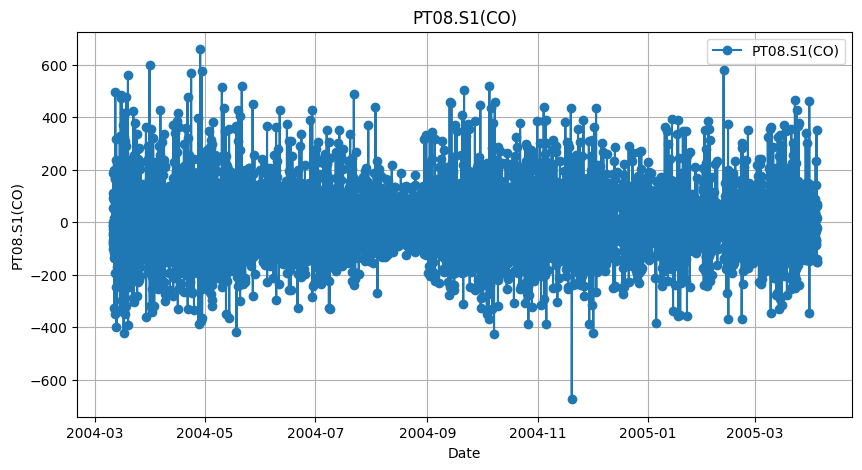

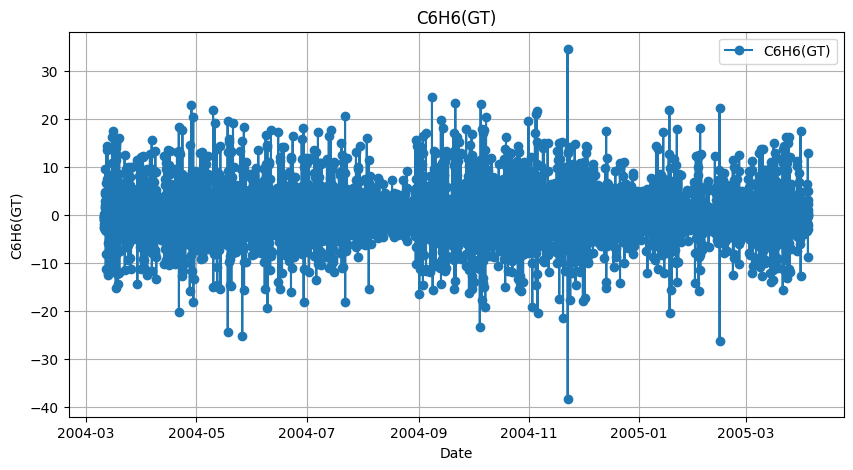

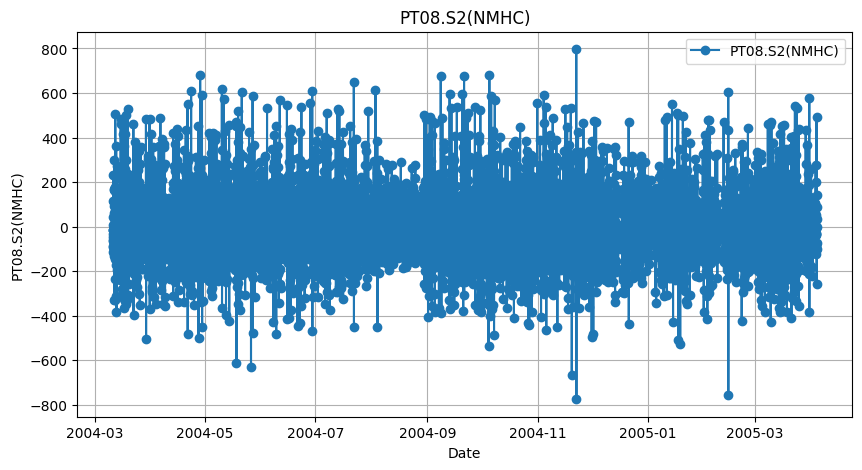

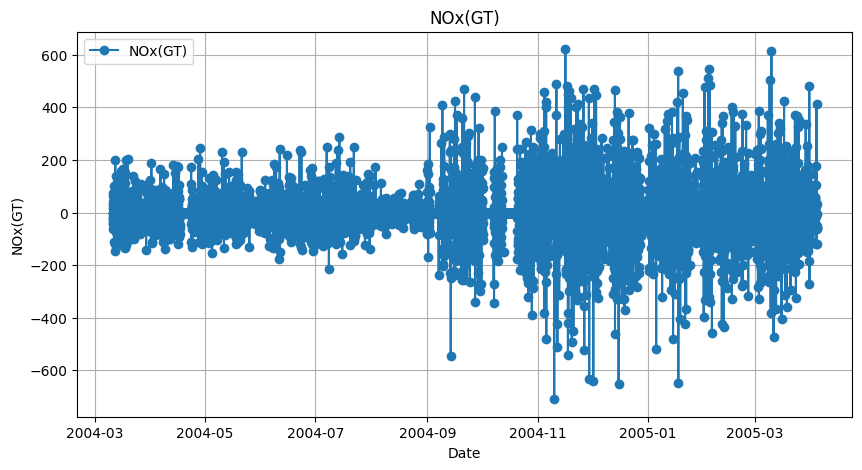

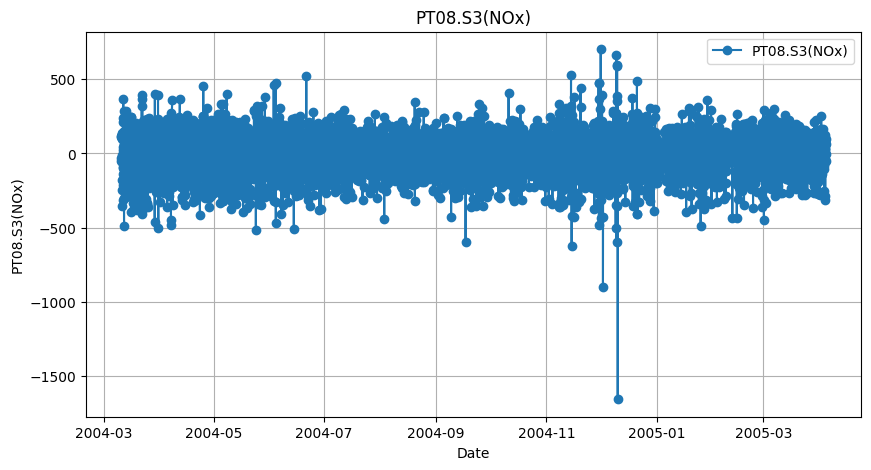

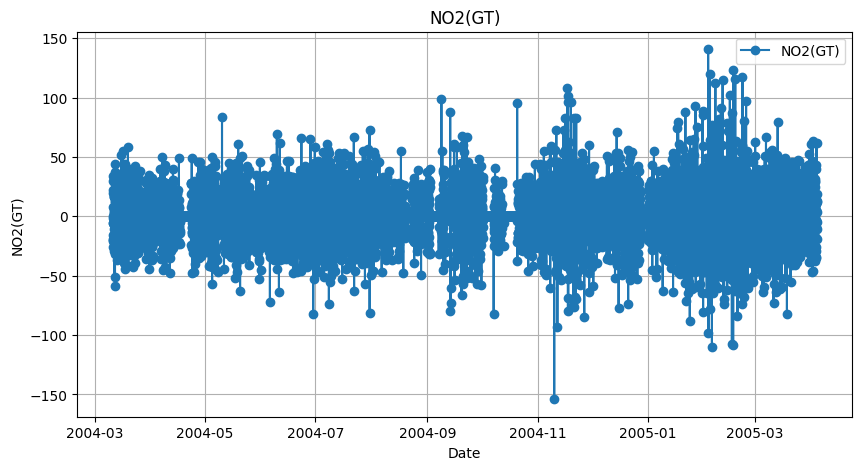

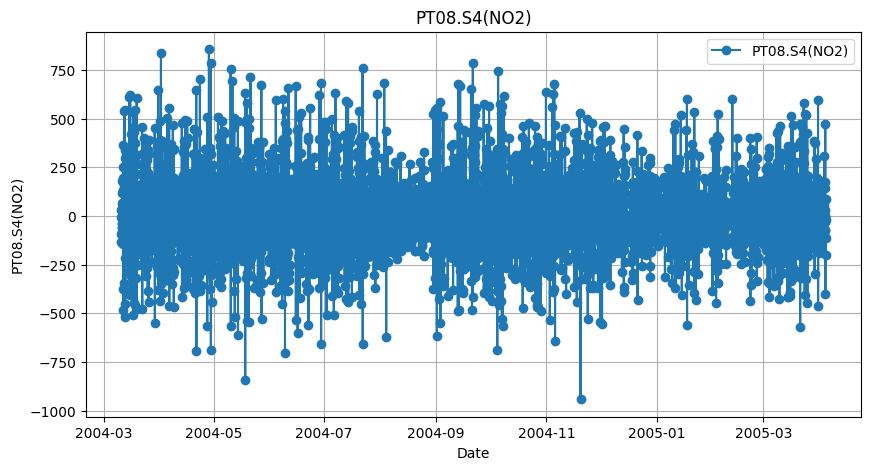

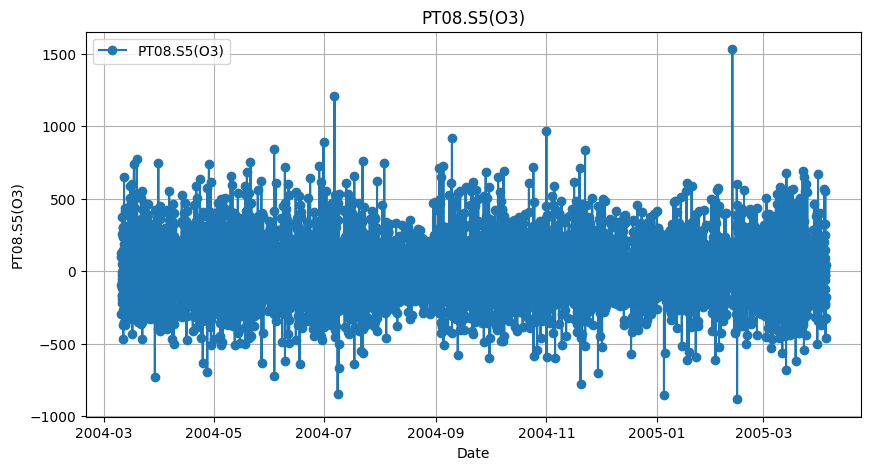

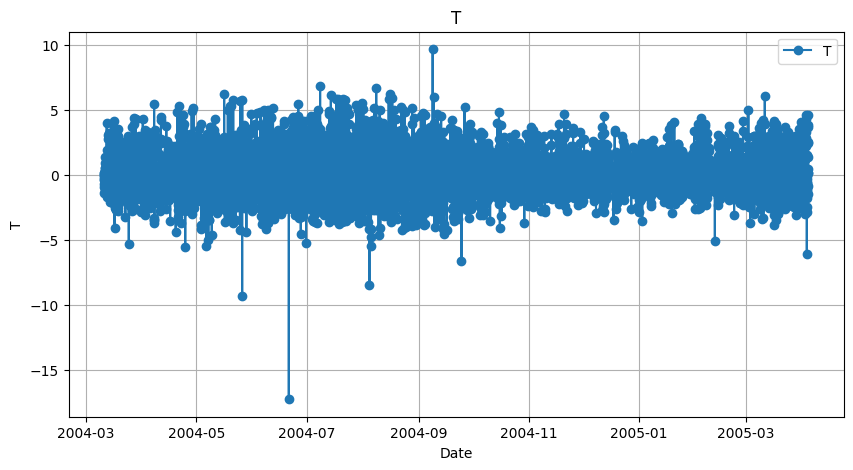

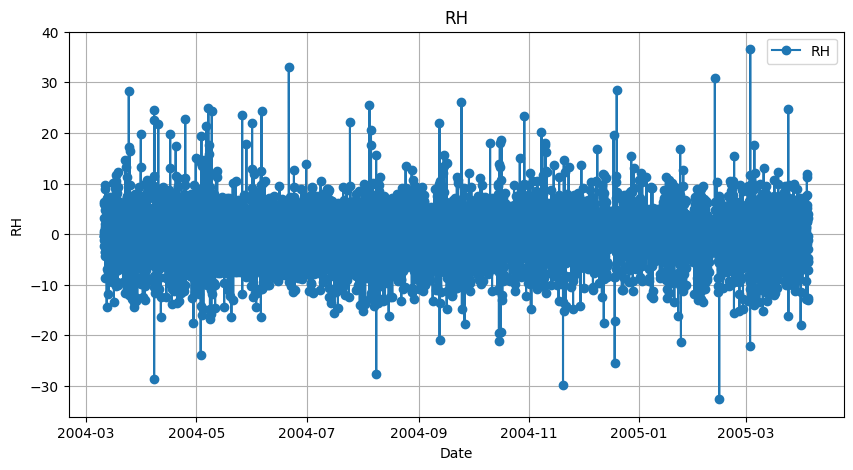

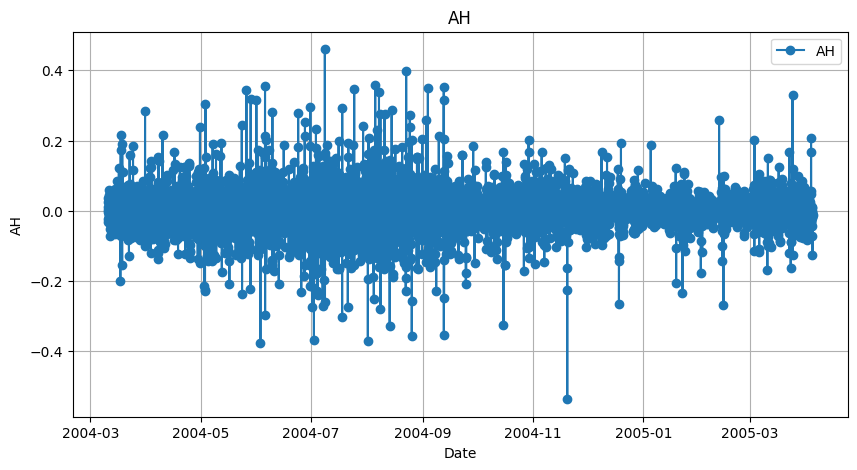

In [ ]:
for column in df.columns[1:]:  # Loop through each column except the first
    plt.figure(figsize=(10, 5))  # Create a new figure for each plot
    plt.plot(df.index, df[column], marker='o', label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid()
    plt.legend()
    plt.show()

# Train-test Split

In [ ]:
train_size = int(len(df) * 0.8)

# Split the DataFrame
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Print the sizes of each dataset
print("Training set size:", train_df.shape)
print("Testing set size:", test_df.shape)

df=train_df

Training set size: (7484, 12)
Testing set size: (1872, 12)


In [ ]:
print("Training set size:", train_df.shape)
print("Testing set size:", test_df.shape)

Training set size: (7484, 12)
Testing set size: (1872, 12)


# LSTM TAKING INSIGHT FROM GRANGER
#### We define a pipeline to train and evaluate an LSTM model for target prediction, including data scaling, LSTM model construction with L2 regularization, and performance evaluation using MSE, RMSE, and MAE. We also handle inverse scaling of predictions for accurate metric reporting.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from tensorflow.keras.regularizers import l2


def prepare_data(df, target_col, feature_cols, train_size=0.8):
    data = df[feature_cols + [target_col]]
    train_size = int(len(data) * train_size)
    train, test = data[:train_size], data[train_size:]

    # Scaling data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)

    # Convert to supervised data for LSTM
    X_train, y_train = train_scaled[:, :-1], train_scaled[:, -1]
    X_test, y_test = test_scaled[:, :-1], test_scaled[:, -1]

    # Reshape for LSTM [samples, timesteps, features]
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    return X_train, y_train, X_test, y_test, scaler

def build_and_train_lstm(X_train, y_train, epochs=50, batch_size=32, dropout_rate=0.2, l2_lambda=0.01):
    model = Sequential()
    # Add output layer with L2 regularization
    model.add(Dense(1, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return model

def evaluate(model, X_test, y_test, scaler, target_name):
    y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1))
    y_test_scaled = scaler.transform(y_test.reshape(-1,1))

    y_pred_scaled = model.predict(X_test)  # Model predictions (scaled)

    # Inverse transform predictions and actual values to their original scale
    y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], X_test.shape[2]), y_pred_scaled.reshape(-1, 1)), axis=1))[:, -1]
    y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], X_test.shape[2]), y_test_scaled.reshape(-1, 1)), axis=1))[:, -1]

    # Calculate MSE, RMSE, and MAE
    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test_rescaled - y_pred_rescaled))

    # Metrics dictionary
    metrics = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
    }

    return metrics


# Using all columns

In [ ]:
causal_columns = {
    'T': ["CO(GT)", "PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)"],
    'RH': ["CO(GT)", "PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)"],
    'AH': ["CO(GT)", "PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)"]
}

metrics_results = {}
for target in causal_columns.keys():
    print(f"\nTraining LSTM for {target} with causal columns: {causal_columns[target]}")

    # Prepare data
    X_train, y_train, X_test, y_test, scaler = prepare_data(df, target, causal_columns[target])

    # Train model
    model = build_and_train_lstm(X_train, y_train)

    # Evaluate  results
    metrics = evaluate(model, X_test, y_test, scaler, target)
    metrics_results[target] = metrics

# Display metrics for each target
print("\nMetrics Results for each target variable:")
for target, metrics in metrics_results.items():
    print(f"{target}: {metrics}")



Training LSTM for T with causal columns: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4349
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2686
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0160
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0150
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0140
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0132
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0120
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0106
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0096
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0077
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0068
Epoch 13/50
188/188 ━━━━━━━

In [ ]:
causal_columns = {
    'T': ['CO(GT)', 'PT08.S1(CO)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)'],
    'RH': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S5(O3)'],
    'AH': ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
}


metrics_results = {}
for target in causal_columns.keys():
    print(f"\nTraining LSTM for {target} with causal columns: {causal_columns[target]}")

    # Prepare data
    X_train, y_train, X_test, y_test, scaler = prepare_data(df, target, causal_columns[target])

    # Train model
    model = build_and_train_lstm(X_train, y_train)

    # Evaluate  results
    metrics = evaluate(model, X_test, y_test, scaler, target)
    metrics_results[target] = metrics

# Display metrics for each target
print("\nMetrics Results for each target variable:")
for target, metrics in metrics_results.items():
    print(f"{target}: {metrics}")



Training LSTM for T with causal columns: ['CO(GT)', 'PT08.S1(CO)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4251
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4200
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4160
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4160
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4128
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4152
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4126
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4141
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4119
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4133
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4155
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4134
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4138


### T (Temperature)
- **MSE** decreased from 0.001421 to 0.001340 (↓ 0.000081 or -5.7%).
- **RMSE** decreased from 0.037697 to 0.036609 (↓ 0.001088 or -2.89%).
- **MAE** decreased from 0.029084 to 0.025581 (↓ 0.003503 or -12.05%).

### RH (Relative Humidity)
- **MSE** decreased from 0.004179 to 0.004150 (↓ 0.000029 or -0.69%).
- **RMSE** decreased from 0.064648 to 0.064418 (↓ 0.000230 or -0.36%).
- **MAE** decreased from 0.044116 to 0.043584 (↓ 0.000532 or -1.21%).

### AH (Absolute Humidity)
- **MSE** decreased from 0.001541 to 0.001451 (↓ 0.000090 or -5.84%).
- **RMSE** decreased from 0.039259 to 0.038093 (↓ 0.001166 or -2.97%).
- **MAE** decreased from 0.024088 to 0.022003 (↓ 0.002085 or -8.66%).

---

### Summary
All metrics for T, RH, and AH have improved (decreased). The most significant relative improvement is observed in **T (MAE)** (-12.05%), while the least improvement is in **RH (MSE)** (-0.69%).

### The differences in metrics (MSE, RMSE, and MAE) between the two approaches are minimal.
### The Granger causality approach simplifies the model by using fewer columns, which likely reduces computational overhead and complexity.

#### Since the model using Granger causality-selected columns achieves almost identical performance compared to the model using all columns, it is more efficient and preferable. By reducing the feature set without sacrificing accuracy, the Granger approach provides a better balance between performance and efficiency.